In [57]:
import json
from pymongo import MongoClient

def collection(uri):
    client = MongoClient(uri)
    database = client["challengeone"]
    collection = database["people"]
    return collection

def load(uri="localhost", datapath="data.json.codechallenge.janv22.RHOBS.json"):
    coll = collection(uri=uri)
    with open(datapath, "r") as fp:
        data = json.load(fp)
    for person in data:
        coll.insert_one(person)

load()

In [59]:
import pandas as pd
# Connexion à la base de données
client = MongoClient("localhost")
db = client["challengeone"]
collection = db["people"]

# Création d'un dataframe à partir des données dans la collection
df = pd.DataFrame(list(collection.find()))



In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               50000 non-null  object
 1   job               50000 non-null  object
 2   company           50000 non-null  object
 3   ssn               50000 non-null  object
 4   residence         50000 non-null  object
 5   current_location  50000 non-null  object
 6   blood_group       50000 non-null  object
 7   website           50000 non-null  object
 8   username          50000 non-null  object
 9   name              50000 non-null  object
 10  sex               50000 non-null  object
 11  address           50000 non-null  object
 12  mail              50000 non-null  object
 13  birthdate         50000 non-null  object
dtypes: object(14)
memory usage: 5.3+ MB


In [61]:
# Comptage du nombre de femmes et d'hommes
nb_femmes = df[df["sex"] == "F"].shape[0]
nb_hommes = df[df["sex"] == "M"].shape[0]

# Affichage des résultats
print("Nombre de femmes : ", nb_femmes)
print("Nombre d'hommes : ", nb_hommes)

Nombre de femmes :  25042
Nombre d'hommes :  24958


Text(0.5, 1.0, 'sexe')

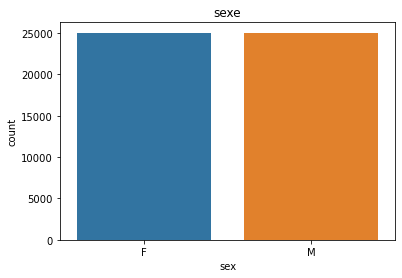

In [62]:
import seaborn as sns
sns.countplot('sex', data=df).set_title("sexe")

In [63]:
def entreprises_plus_de_n_personnes(df, n):
    entreprises = df.groupby('company').size().reset_index(name='nombre_employes')
    entreprises = entreprises[entreprises["nombre_employes"] > n]
    print("Entreprises ayant plus de {} employés :\n".format(n))
    for i in range(len(entreprises)):
        print("{} ({} employés)".format(entreprises.iloc[i]["company"], entreprises.iloc[i]["nombre_employes"]))

In [48]:
n = 20
entreprises_plus_de_n_personnes(df, n)

Entreprises ayant plus de 20 employés :

Adam (189 employés)
Adam SA (21 employés)
Albert (228 employés)
Alexandre (207 employés)
Alexandre S.A. (27 employés)
Alexandre et Fils (24 employés)
Allain (174 employés)
Allain SA (24 employés)
Allain et Fils (24 employés)
Allard (192 employés)
Allard S.A. (33 employés)
Allard S.A.S. (21 employés)
Allard SARL (24 employés)
Alves (165 employés)
Alves S.A.S. (30 employés)
Alves et Fils (21 employés)
Andre (195 employés)
Andre S.A.R.L. (24 employés)
Andre SA (24 employés)
Antoine (174 employés)
Antoine S.A.R.L. (21 employés)
Antoine SA (27 employés)
Antoine SARL (24 employés)
Arnaud (186 employés)
Arnaud S.A.R.L. (27 employés)
Arnaud S.A.S. (24 employés)
Arnaud et Fils (21 employés)
Aubert (183 employés)
Aubert SA (27 employés)
Aubert SARL (36 employés)
Aubry (162 employés)
Aubry S.A.S. (21 employés)
Aubry SARL (24 employés)
Auger (180 employés)
Auger S.A. (27 employés)
Auger S.A.R.L. (24 employés)
Auger SARL (21 employés)
Auger et Fils (21 emplo

In [20]:
n = 80
entreprises_plus_de_n_personnes(df, n)

Entreprises ayant plus de 80 employés :

Bernard (81 employés)
Bonnet (82 employés)
Evrard (83 employés)
Gay (84 employés)
Leclercq (81 employés)
Monnier (81 employés)
Normand (82 employés)
Pottier (81 employés)


In [49]:
import matplotlib.pyplot as plt
def pyramide_ages_metier(df, metier):
    data_metier = df[df["job"] == metier]
    ages = data_metier["birthdate"].apply(lambda x: pd.Timestamp.now().year - pd.to_datetime(x).year)
    plt.hist([ages], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], color=['#FF5733'], label=['{}s'.format(metier)])
    plt.legend()
    plt.xlabel('Âge')
    plt.ylabel('Nombre de personnes')
    plt.title('Pyramide des âges pour le métier de {}'.format(metier))
    plt.show()

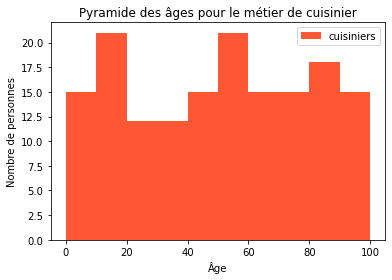

In [50]:
metier = "cuisinier"
pyramide_ages_metier(df, metier)

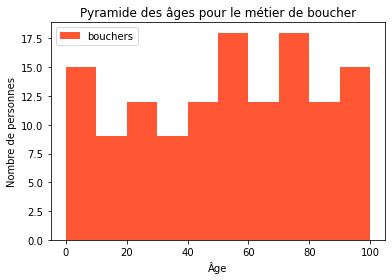

In [51]:
metier = "boucher"
pyramide_ages_metier(df, metier)